In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_column", None)

## for visulize
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

### Train dataset

#### Missing data

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

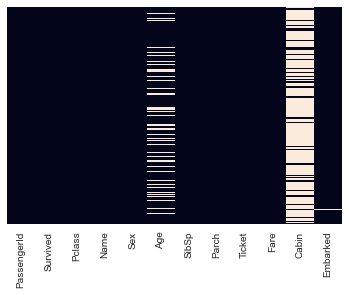

In [5]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

In [6]:
features_with_null = []
for feature in df.columns:
    if df[feature].isnull().sum() >= 1:
        features_with_null.append(feature)
        
for feature in features_with_null:
    print(feature, np.round(df[feature].isnull().mean(), 4)*100,  ' % missing values')

Age 19.869999999999997  % missing values
Cabin 77.10000000000001  % missing values
Embarked 0.22  % missing values


Drop column Cabin due to lots of null value 
Drop null values in Embarked columns due to less than 1% observations 

In [7]:
df.drop("Cabin", axis=1,inplace=True)

##### Handle missing value

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

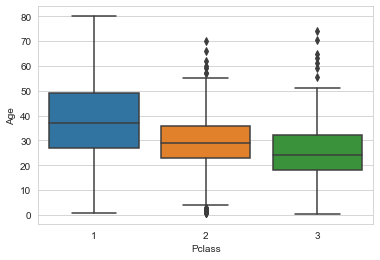

In [8]:
# Age columns
## due to the fact that only 20% missing, filling by mean,median can be an option
sns.boxplot(x="Pclass", y="Age",data=df)

In [9]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

So at class 1, people tend to be older
=> Use average value to fill in each specific class

In [10]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
df["Age"] = df[["Age","Pclass"]].apply(fill_age,axis=1)

In [12]:
# Check null again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df.dropna(inplace=True)

#### Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

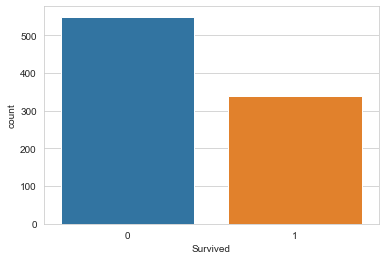

In [14]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

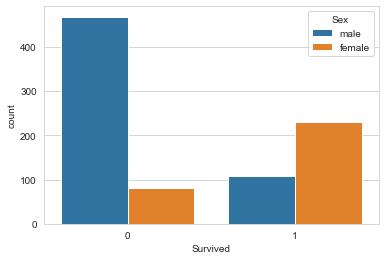

In [15]:
sns.countplot(x="Survived",hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

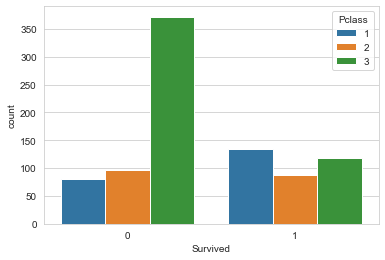

In [16]:
sns.countplot(x="Survived",hue="Pclass", data=df)

C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

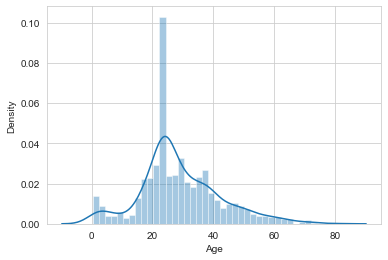

In [17]:
# due to 20% null value in Age, dropna to see distributiom
sns.distplot(df["Age"].dropna(),bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

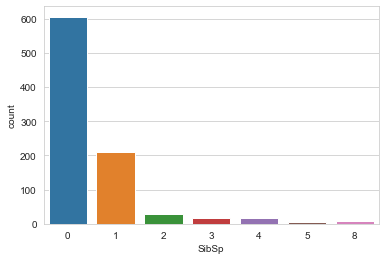

In [18]:
sns.countplot(x="SibSp", data=df)

In [19]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

<AxesSubplot:>

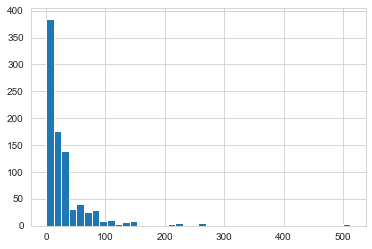

In [20]:
# due to 20% null value in Age, dropna to see distributiom
df["Fare"].hist(bins=40)

#### Converting Categorical Features

In [21]:
# use get_dummies to transform into numerical variables
# Drop_first = true, because if there are 2 columns, one of them will represent the other when transform
sex = pd.get_dummies(df["Sex"], drop_first=True)
embark = pd.get_dummies(df["Embarked"], drop_first=True)

In [22]:
df = pd.concat([df,sex,embark],axis=1)

In [23]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Test dataset

In [25]:
test_df = pd.read_csv("test.csv")

#### Missing value

In [26]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
features_with_nan = []
for feature in test_df.columns:
    if test_df[feature].isnull().sum() >= 1:
        features_with_nan.append(feature)
        
for feature in features_with_nan:
    print(feature, np.round(test_df[feature].isnull().mean(), 4)*100,  ' % missing values')

Age 20.57  % missing values
Fare 0.24  % missing values
Cabin 78.23  % missing values


In [28]:
test_df.drop("Cabin", axis=1,inplace=True)

#### Handle missing value

In [29]:
test_df.groupby("Pclass")["Age"].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [30]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
test_df["Age"] = test_df[["Age","Pclass"]].apply(fill_age,axis=1)

In [32]:
# There are one value filling NAN in Age column
test_df[test_df["Age"].isnull()] = test_df[test_df["Age"].isnull()].fillna(29)

In [33]:
# There are one value filling NAN in Fare column
test_df[test_df["Fare"].isnull()] = test_df[test_df["Fare"].isnull()].fillna(12)

#### Converting Categorical Features

In [34]:
# use get_dummies to transform into numerical variables
# Drop_first = true, because if there are 2 columns, one of them will represent the other when transform
sex = pd.get_dummies(test_df["Sex"], drop_first=True)
embark = pd.get_dummies(test_df["Embarked"], drop_first=True)

In [35]:
test_df = pd.concat([test_df,sex,embark],axis=1)

In [36]:
test_df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [37]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


## Logistic Regression model

### Train model

In [71]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
X_train = df.drop(["PassengerId","Survived","Parch","Fare"], axis=1)
y_train = df["Survived"]

In [56]:
## Run a linear regression with the above predictors
X2 = sm.add_constant(X_train)
# X2 = X
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     82.93
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.82e-92
Time:                        21:25:43   Log-Likelihood:                -394.96
No. Observations:                 889   AIC:                             805.9
Df Residuals:                     881   BIC:                             844.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3733      0.076     18.126      0.0

In [72]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,35.521745,const
1,1.840371,Pclass
2,1.298977,Age
3,1.142126,SibSp
4,1.596439,Fare
5,1.076154,male
6,1.483408,Q
7,1.463041,S


In [59]:
X_test = test_df.drop(["PassengerId","Parch","Fare"], axis=1)
y_test = pd.read_csv("gender_submission.csv")["Survived"]

### Training and Predicting

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
accuracy = confusion_matrix(y_test,predictions)

In [65]:
accuracy

array([[251,  15],
       [ 12, 140]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9354066985645934

### Evaluation

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.92      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418

